## Generative Summarization
This notebook demonstrates the final summarization process to transform the final keyframes into a single representative image. The methods are listed below and are explored in detail under their appropriate section. NOTE: The interpolation method is not a proposed summarization method but is used to demonstrate how to blend keyframes into a new video.
1. **Image Averaging**: This method involves taking a set of keyframes and computing their average to produce a single representative image. Each pixel value in the resulting image is the mean of the corresponding pixel values in the input keyframes.
2. **Interpolation**: Interpolation in this context refers to generating intermediate frames between existing keyframes to create a smoother transition. 
3. **Autoencoder**: In the context of keyframes, an autoencoder could be trained to compress them into a lower-dimensional space and then reconstruct them. The representative image could be an output from the bottleneck layer or a reconstructed image that captures the main features of the set. I explore both autoencoders and variational autoencoders, providing both deterministic and probabilistic approaches to encoding and decoding, respectively. 
4. **Generative Adversarial Network (GAN)**: GANs consist of two neural networks, the generator and the discriminator, which are trained together. The generator tries to produce indistinguishable data from real data, while the discriminator tries to distinguish between real and fake data. In the context of keyframes, a GAN could be trained to generate a representative image statistically similar to the set of keyframes. I explore using the VAE encoder as a discriminator and a general GNN approach. 
\

In [154]:
# Load images and reshape images
import os
import glob
import cv2
import numpy as np

def preprocess(imgs):
    print("Shape before preprocessing:", imgs.shape)  
    imgs = imgs.astype("float32") / 255.0
    imgs = np.expand_dims(imgs, -1)
    print("Shape after preprocessing:", imgs.shape)
    return imgs

def load_images_from_folder(folder):
    images = []
    for filename in glob.glob(os.path.join(folder, 'key*.png')): 
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return np.array(images)

directory = './output/keyframes/2/'

# Load images from the directory
loaded_images = load_images_from_folder(directory)
print("Shape of loaded images:", loaded_images.shape)
# Preprocess the loaded images
preprocessed_images = preprocess(loaded_images)

Shape of loaded images: (91, 360, 640)
Shape before preprocessing: (91, 360, 640)
Shape after preprocessing: (91, 360, 640, 1)


#### I. **Image Averaging**

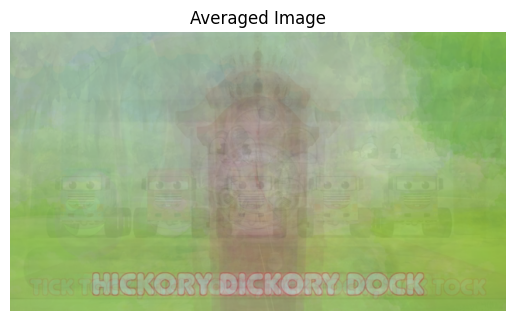

In [126]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def average_images_in_directory(directory_path):
    """
    Averages all images in a directory and displays the result using Matplotlib.
    Parameters:
    - directory_path: str, path to the directory containing the images
    Returns:
    None. The function displays the averaged image.
    """
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.png') or f.endswith('.jpg')]
    if not image_files:
        print("No image files found in the directory.")
        return
    
    # Read the first image to get the dimensions
    first_image_path = os.path.join(directory_path, image_files[0])
    first_image = cv2.imread(first_image_path).astype(np.float32)

    # Initialize the sum with the first image
    img_sum = np.zeros_like(first_image, dtype=np.float32)
    num_images = 0
    for image_file in image_files:
        image_path = os.path.join(directory_path, image_file)
        img = cv2.imread(image_path).astype(np.float32)
        # Normalize the image to [0, 1]
        img /= 255.0
        img_sum += img
        num_images += 1

    # Calculate the average image
    averaged_img = img_sum / num_images
    # Convert the average image back to [0, 255]
    averaged_img *= 255.0
    averaged_img = averaged_img.astype(np.uint8)
    plt.imshow(cv2.cvtColor(averaged_img, cv2.COLOR_BGR2RGB))
    plt.title('Averaged Image')
    plt.axis('off')
    plt.show()

# Example usage
directory_path = "./output/keyframes/2/"
average_images_in_directory(directory_path)

#### II. **Interpolation**

Previewing representative image for video 1: cut_segment_10__fromkeyvideo_filtered
Previewing representative image for video 2: cut_segment_11__fromkeyvideo_filtered
Previewing representative image for video 3: cut_segment_12__fromkeyvideo_filtered


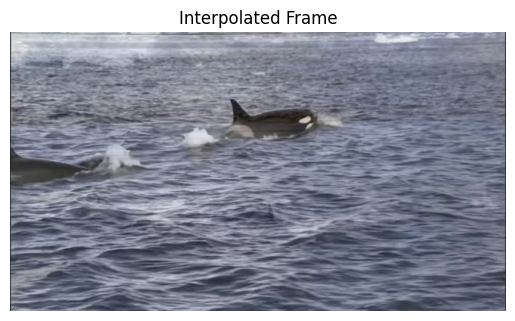

Previewing representative image for video 4: cut_segment_13__fromkeyvideo_filtered
Previewing representative image for video 5: cut_segment_14__fromkeyvideo_filtered


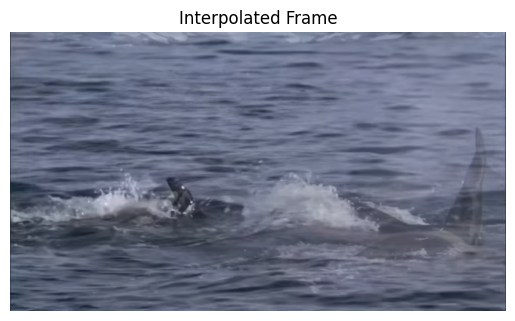

Previewing representative image for video 6: cut_segment_15__fromkeyvideo_filtered
Previewing representative image for video 7: cut_segment_16__fromkeyvideo_filtered
Previewing representative image for video 8: cut_segment_17__fromkeyvideo_filtered
Previewing representative image for video 9: cut_segment_18__fromkeyvideo_filtered
Previewing representative image for video 10: cut_segment_19__fromkeyvideo_filtered
Previewing representative image for video 11: cut_segment_1__fromkeyvideo_filtered
Previewing representative image for video 12: cut_segment_20__fromkeyvideo_filtered
Previewing representative image for video 13: cut_segment_21__fromkeyvideo_filtered
Previewing representative image for video 14: cut_segment_22__fromkeyvideo_filtered


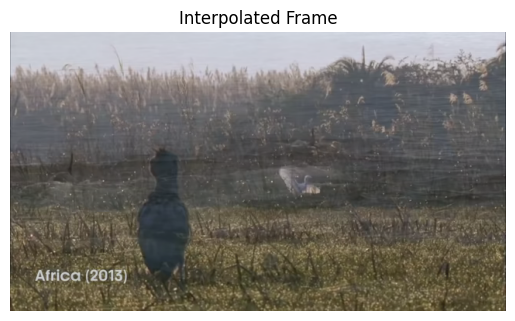

Previewing representative image for video 15: cut_segment_23__fromkeyvideo_filtered
Previewing representative image for video 16: cut_segment_24__fromkeyvideo_filtered
Previewing representative image for video 17: cut_segment_25__fromkeyvideo_filtered
Previewing representative image for video 18: cut_segment_26__fromkeyvideo_filtered
Previewing representative image for video 19: cut_segment_27__fromkeyvideo_filtered
Previewing representative image for video 20: cut_segment_28__fromkeyvideo_filtered
Previewing representative image for video 21: cut_segment_29__fromkeyvideo_filtered
Previewing representative image for video 22: cut_segment_2__fromkeyvideo_filtered
Previewing representative image for video 23: cut_segment_30__fromkeyvideo_filtered
Previewing representative image for video 24: cut_segment_31__fromkeyvideo_filtered
Previewing representative image for video 25: cut_segment_32__fromkeyvideo_filtered
Previewing representative image for video 26: cut_segment_33__fromkeyvideo_fi

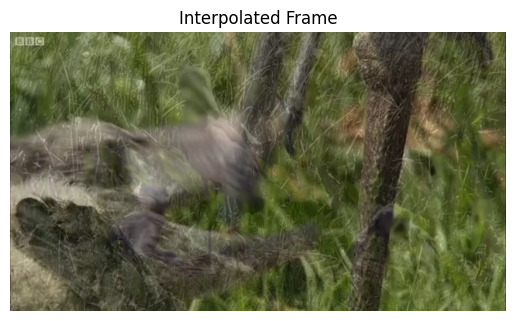

Previewing representative image for video 33: cut_segment_3__fromkeyvideo_filtered


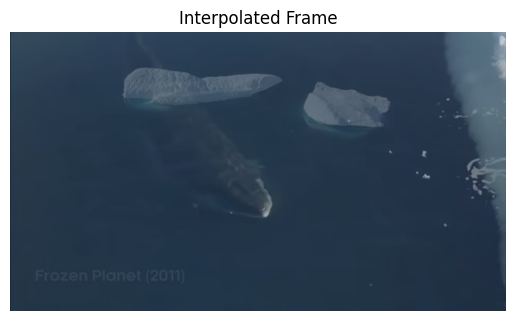

Previewing representative image for video 34: cut_segment_40__fromkeyvideo_filtered
Previewing representative image for video 35: cut_segment_41__fromkeyvideo_filtered


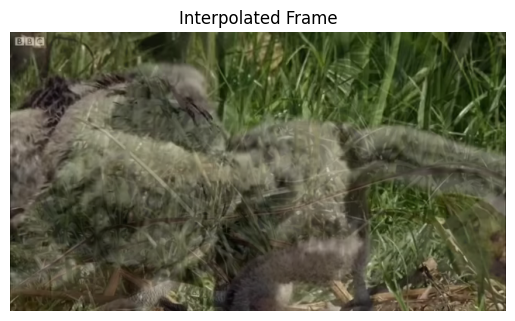

Previewing representative image for video 36: cut_segment_42__fromkeyvideo_filtered
Previewing representative image for video 37: cut_segment_43__fromkeyvideo_filtered


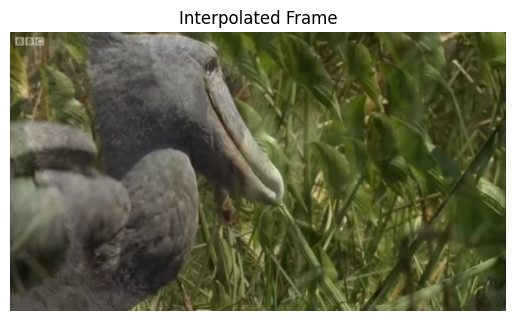

Previewing representative image for video 38: cut_segment_44__fromkeyvideo_filtered
Previewing representative image for video 39: cut_segment_45__fromkeyvideo_filtered
Previewing representative image for video 40: cut_segment_46__fromkeyvideo_filtered
Previewing representative image for video 41: cut_segment_47__fromkeyvideo_filtered
Previewing representative image for video 42: cut_segment_48__fromkeyvideo_filtered
Previewing representative image for video 43: cut_segment_49__fromkeyvideo_filtered
Previewing representative image for video 44: cut_segment_4__fromkeyvideo_filtered
Previewing representative image for video 45: cut_segment_50__fromkeyvideo_filtered
Previewing representative image for video 46: cut_segment_51__fromkeyvideo_filtered
Previewing representative image for video 47: cut_segment_52__fromkeyvideo_filtered
Previewing representative image for video 48: cut_segment_53__fromkeyvideo_filtered
Previewing representative image for video 49: cut_segment_54__fromkeyvideo_fi

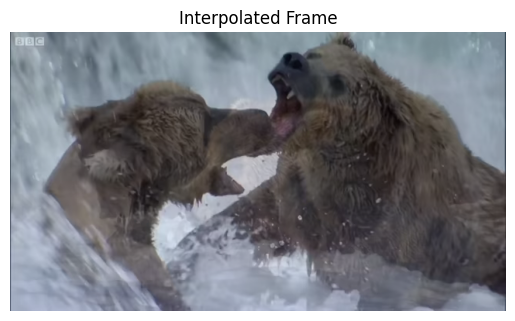

Previewing representative image for video 50: cut_segment_55__fromkeyvideo_filtered


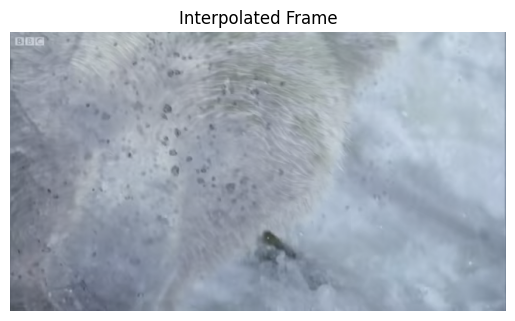

Previewing representative image for video 51: cut_segment_56__fromkeyvideo_filtered


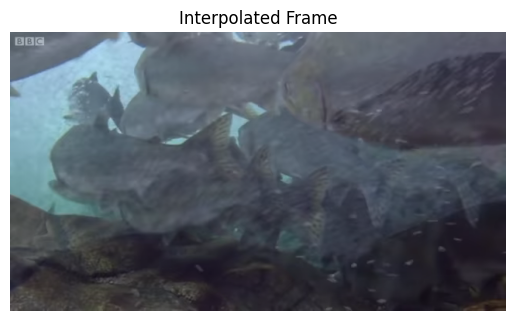

Previewing representative image for video 52: cut_segment_57__fromkeyvideo_filtered
Previewing representative image for video 53: cut_segment_58__fromkeyvideo_filtered


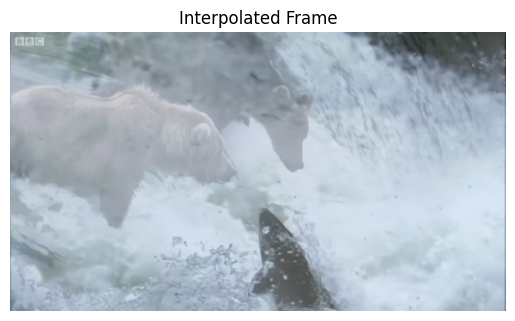

Previewing representative image for video 54: cut_segment_59__fromkeyvideo_filtered
Previewing representative image for video 55: cut_segment_5__fromkeyvideo_filtered
Previewing representative image for video 56: cut_segment_60__fromkeyvideo_filtered
Previewing representative image for video 57: cut_segment_61__fromkeyvideo_filtered
Previewing representative image for video 58: cut_segment_62__fromkeyvideo_filtered
Previewing representative image for video 59: cut_segment_63__fromkeyvideo_filtered
Previewing representative image for video 60: cut_segment_64__fromkeyvideo_filtered
Previewing representative image for video 61: cut_segment_65__fromkeyvideo_filtered
Previewing representative image for video 62: cut_segment_66__fromkeyvideo_filtered
Previewing representative image for video 63: cut_segment_67__fromkeyvideo_filtered


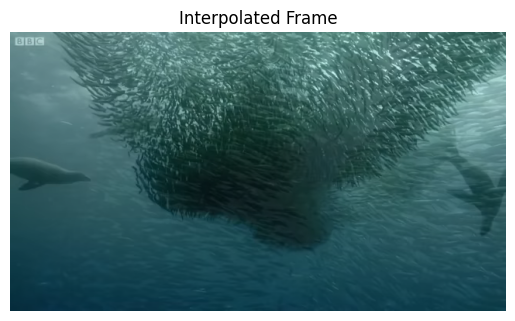

Previewing representative image for video 64: cut_segment_68__fromkeyvideo_filtered
Previewing representative image for video 65: cut_segment_69__fromkeyvideo_filtered


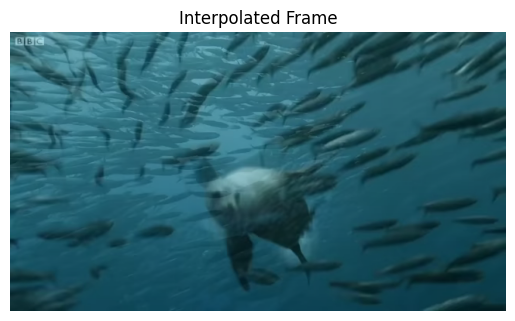

Previewing representative image for video 66: cut_segment_6__fromkeyvideo_filtered
Previewing representative image for video 67: cut_segment_70__fromkeyvideo_filtered
Previewing representative image for video 68: cut_segment_71__fromkeyvideo_filtered


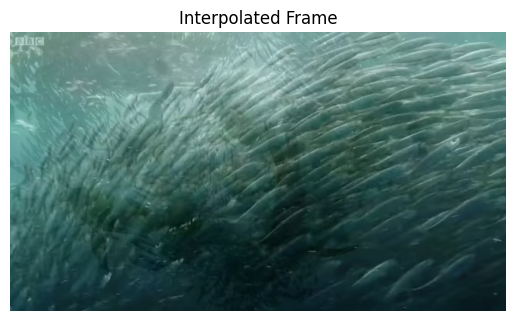

Previewing representative image for video 69: cut_segment_72__fromkeyvideo_filtered


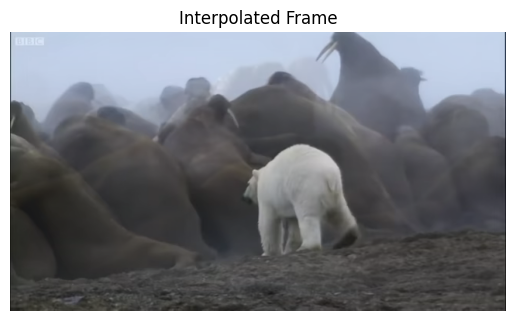

Previewing representative image for video 70: cut_segment_73__fromkeyvideo_filtered
Previewing representative image for video 71: cut_segment_74__fromkeyvideo_filtered
Previewing representative image for video 72: cut_segment_75__fromkeyvideo_filtered
Previewing representative image for video 73: cut_segment_76__fromkeyvideo_filtered
Previewing representative image for video 74: cut_segment_77__fromkeyvideo_filtered
Previewing representative image for video 75: cut_segment_78__fromkeyvideo_filtered


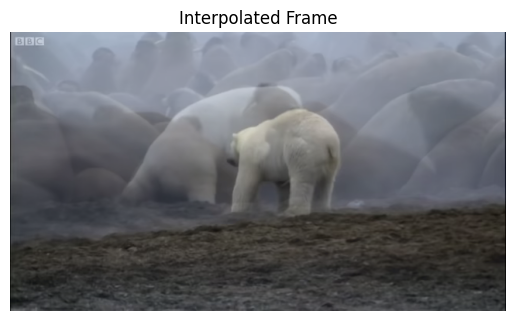

Previewing representative image for video 76: cut_segment_79__fromkeyvideo_filtered
Previewing representative image for video 77: cut_segment_7__fromkeyvideo_filtered
Previewing representative image for video 78: cut_segment_80__fromkeyvideo_filtered


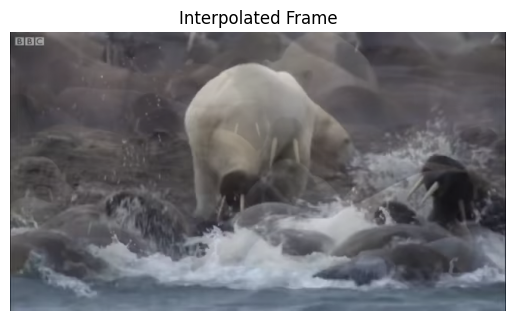

Previewing representative image for video 79: cut_segment_81__fromkeyvideo_filtered


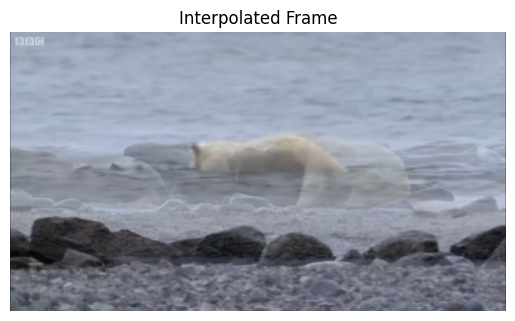

Previewing representative image for video 80: cut_segment_8__fromkeyvideo_filtered
Previewing representative image for video 81: cut_segment_9__fromkeyvideo_filtered


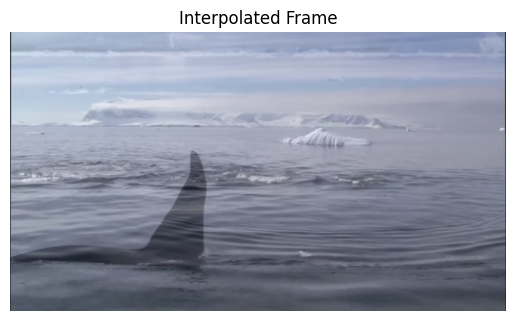

In [11]:
import cv2
import os
import glob
import matplotlib.pyplot as plt

def interpolate_frames(frame1, frame2, alpha=0.3): # Adjust this alpha value to change the degree of interpolation
    return cv2.addWeighted(frame1, alpha, frame2, 1 - alpha, 0)

def generate_representative_image(video_path):
    cap = cv2.VideoCapture(video_path)
    ret, frame1 = cap.read()
    cap.set(cv2.CAP_PROP_POS_FRAMES, 5)  # Skip to the 5th frame
    ret, frame2 = cap.read()
    cap.release()
    if ret:
        interpolated_frame = interpolate_frames(frame1, frame2)
        plt.imshow(cv2.cvtColor(interpolated_frame, cv2.COLOR_BGR2RGB))
        plt.title('Interpolated Frame')
        plt.axis('off')
        plt.show()

video_dir = './output/cut_segments/7/'
for idx, video_file in enumerate(glob.glob(f"{video_dir}/*.mp4")):
    video_name = os.path.basename(video_file).split('.')[0]
    print(f"Previewing representative image for video {idx+1}: {video_name}")
    generate_representative_image(video_file)

#### III. **Autoencoder & Variational Autoencoder (VAE)**

##### 1. Autoencoder

In [236]:
from sklearn.model_selection import train_test_split

def resize_images(imgs, shape=(32, 32)):
    resized_imgs = np.array([cv2.resize(img, shape) for img in imgs])
    return resized_imgs
# Resize the loaded images
resized_images = resize_images(loaded_images)
preprocessed_images = preprocess(resized_images)
train_images, test_images = train_test_split(preprocessed_images, test_size=0.1, random_state=42)

Shape before preprocessing: (91, 32, 32)
Shape after preprocessing: (91, 32, 32, 1)


In [171]:
from tensorflow.keras import layers, models, regularizers
import tensorflow.keras.backend as K
import numpy as np

# Build the Encoder
encoder_input = layers.Input(shape=(32, 32, 1), name="encoder_input")
x = layers.Conv2D(32, (3, 3), strides=2, activation='relu', padding="same", kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(encoder_input)
x = layers.Dropout(0.1)(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3), strides=2, activation='relu', padding="same", kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(x)
x = layers.Conv2D(64, (3, 3), strides=2, activation='relu', padding="same", kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(x)
x = layers.Conv2D(64, (3, 3), strides=2, activation='relu', padding="same", kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), strides=2, activation='relu', padding="same")(x)
shape_before_flattening = K.int_shape(x)[1:]
x = layers.Flatten()(x)
encoder_output = layers.Dense(2, name="encoder_output")(x)
encoder = models.Model(encoder_input, encoder_output)

# Build the Decoder
decoder_input = layers.Input(shape=(2,), name="decoder_input")
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding="same")(x)
x = layers.Dropout(0.1)(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding="same")(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding="same")(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding="same")(x)
decoder_output = layers.Conv2D(1, (3, 3), strides=1, activation='sigmoid', padding="same", name="decoder_output")(x)
decoder = models.Model(decoder_input, decoder_output)

# Compile and Train the Autoencoder
autoencoder = models.Model(encoder_input, decoder(encoder_output))
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.fit(train_images, train_images, epochs=250, batch_size=5, shuffle=True, validation_data=(test_images, test_images))


Epoch 1/250
17/17 [==============================] - 2s 23ms/step - loss: 0.7074 - val_loss: 0.7372
Epoch 2/250
17/17 [==============================] - 0s 11ms/step - loss: 0.6629 - val_loss: 0.7353
Epoch 3/250
17/17 [==============================] - 0s 11ms/step - loss: 0.6490 - val_loss: 0.7329
Epoch 4/250
17/17 [==============================] - 0s 11ms/step - loss: 0.6464 - val_loss: 0.7319
Epoch 5/250
17/17 [==============================] - 0s 11ms/step - loss: 0.6378 - val_loss: 0.7313
Epoch 6/250
17/17 [==============================] - 0s 11ms/step - loss: 0.6291 - val_loss: 0.7276
Epoch 7/250
17/17 [==============================] - 0s 11ms/step - loss: 0.6250 - val_loss: 0.7255
Epoch 8/250
17/17 [==============================] - 0s 11ms/step - loss: 0.6285 - val_loss: 0.7243
Epoch 9/250
17/17 [==============================] - 0s 11ms/step - loss: 0.6315 - val_loss: 0.7285
Epoch 10/250
17/17 [==============================] - 0s 11ms/step - loss: 0.6205 - val_loss: 0.7250

3/3 [==============================] - 0s 4ms/step


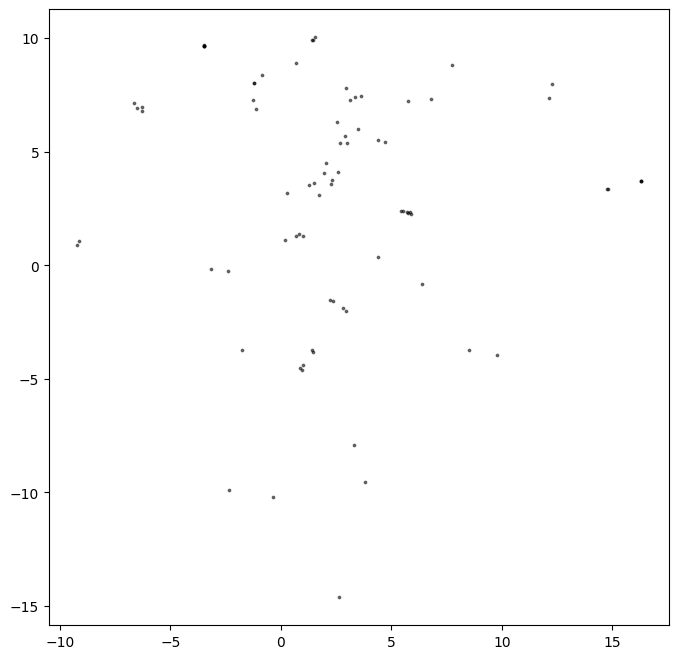

1/1 [==============================] - 0s 119ms/step


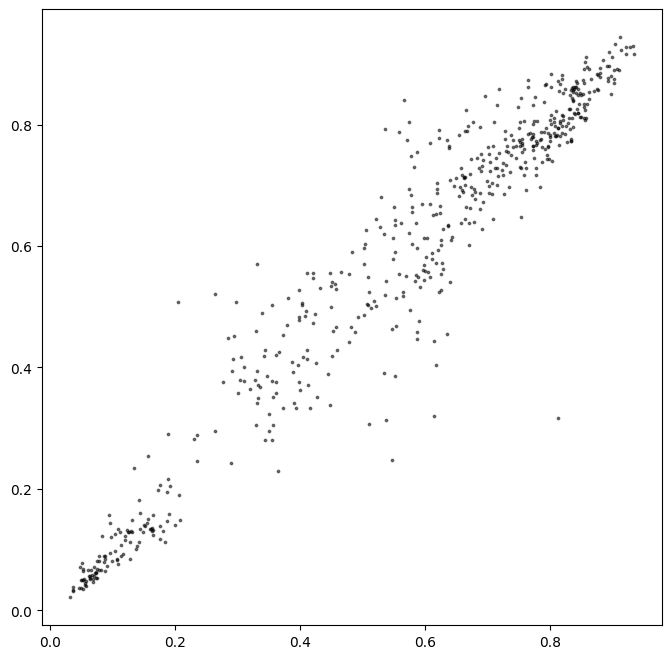

In [172]:
from matplotlib import pyplot as plt
embeddings = encoder.predict(train_images)

plt.figure(figsize=(8, 8))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c="black", alpha=0.5, s=3)
plt.show()


mins, maxs = np.min(embeddings, axis=0), np.max(embeddings, axis=0)
sample = np.random.uniform(mins, maxs, size=(18, 2))
reconstructions = decoder.predict(sample)
plt.figure(figsize=(8, 8))
plt.scatter(reconstructions[:, 0], reconstructions[:, 1], c="black", alpha=0.5, s=3)
plt.show()

1/1 [==============================] - 0s 92ms/step


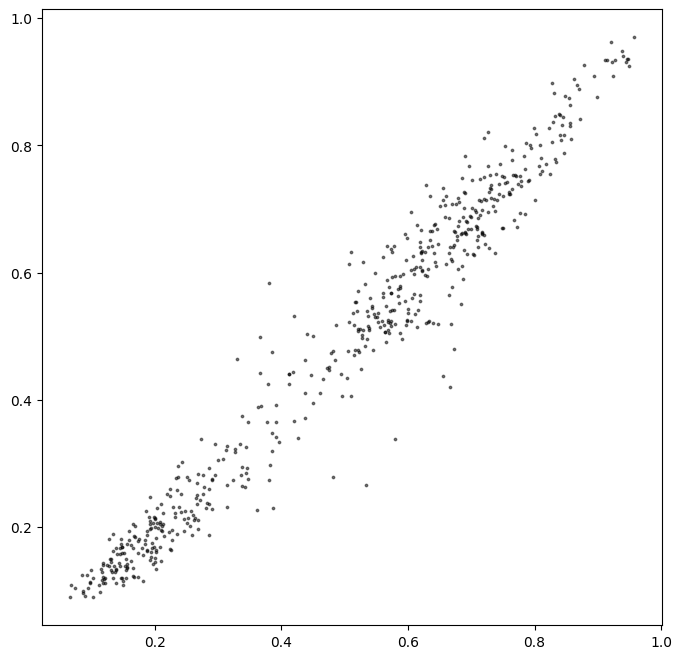

In [147]:
mins, maxs = np.min(embeddings, axis=0), np.max(embeddings, axis=0)
sample = np.random.uniform(mins, maxs, size=(18, 2))
reconstructions = decoder.predict(sample)
plt.figure(figsize=(8, 8))
plt.scatter(reconstructions[:, 0], reconstructions[:, 1], c="black", alpha=0.5, s=3)
plt.show()

#### Preview the original pictures with their reconstructed counterparts

1/1 [==============================] - 0s 155ms/step


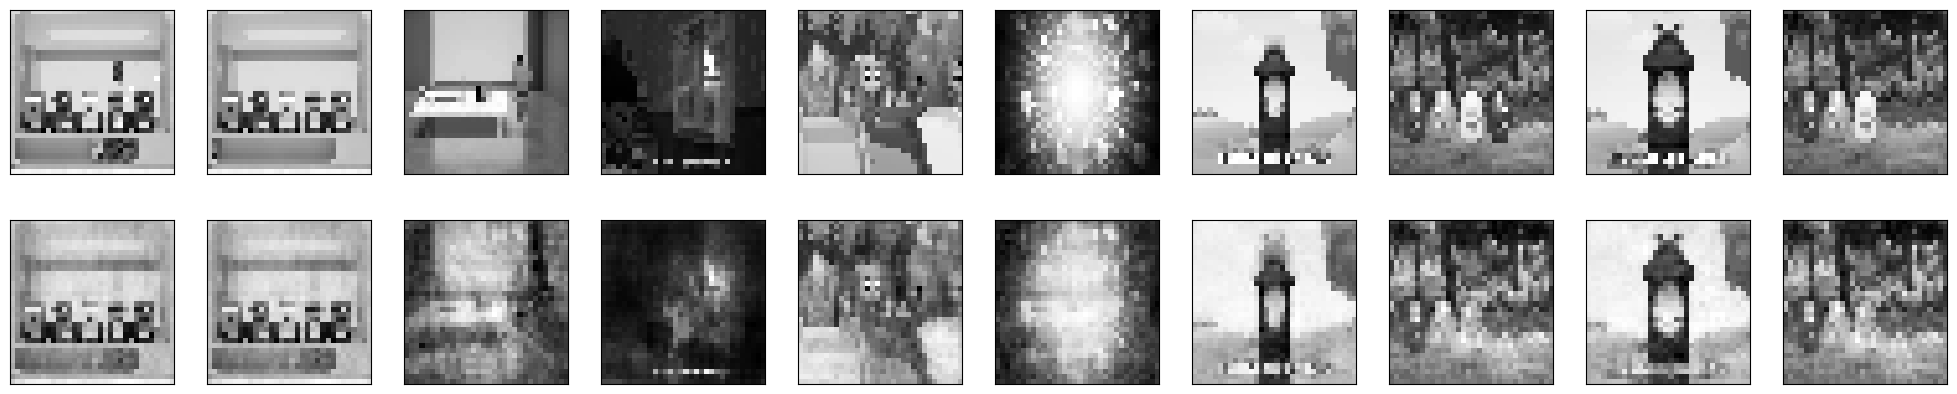

In [173]:
import matplotlib.pyplot as plt
indices = np.random.randint(0, len(train_images), size=10)
# Sample images
sample_images = preprocessed_images[indices]
# Get the reconstructed images
reconstructed_images = autoencoder.predict(sample_images)
n = 10  # Number of images to display
plt.figure(figsize=(25, 5))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(sample_images[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

1/1 [==============================] - 0s 15ms/step


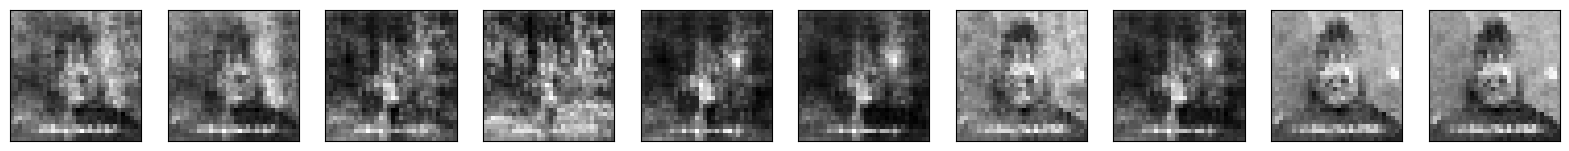

In [174]:
# Generate random points in the latent space
random_points = np.random.normal(0, 1, (10, 2))
# Decode them to images
generated_images = decoder.predict(random_points)
# Display
plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(generated_images[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [198]:
from tensorflow.keras import layers, models, metrics, losses
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import numpy as np

# Sampling layer
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Encoder with Batch Normalization
encoder_input = layers.Input(shape=(32, 32, 1), name="encoder_input")
x = layers.Conv2D(32, (3, 3), strides=2, padding="same", kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(encoder_input)

x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(64, (3, 3), strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(64, (3, 3), strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(32, (3, 3), strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
shape_before_flattening = tf.keras.backend.int_shape(x)[1:]

x = layers.Flatten()(x)
z_mean = layers.Dense(2, name="z_mean")(x)
z_log_var = layers.Dense(2, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = models.Model(encoder_input, [z_mean, z_log_var, z], name="encoder")

# Decoder with Batch Normalization
decoder_input = layers.Input(shape=(2,), name="decoder_input")
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = layers.Reshape(shape_before_flattening)(x)

x = layers.Conv2DTranspose(32, (3, 3), strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2DTranspose(64, (3, 3), strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)
decoder_output = layers.Conv2D(1, (3, 3), strides=1, activation='sigmoid', padding="same", name="decoder_output")(x)
decoder = models.Model(decoder_input, decoder_output)

# VAE class
class VAE(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs): 
        z_mean, z_log_var, z = encoder(inputs)
        reconstruction = decoder(z)
        return z_mean, z_log_var, reconstruction

    def train_step(self, data): 
        with tf.GradientTape() as tape:
            z_mean, z_log_var, reconstruction = self(data)
            reconstruction_loss = tf.reduce_mean(
                500
                * losses.binary_crossentropy(
                    data, reconstruction, axis=(1, 2, 3)
                )
            ) 
            kl_loss = tf.reduce_mean(
                tf.reduce_sum(
                    -0.5
                    * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)),
                    axis = 1,
                )
            )
            total_loss = reconstruction_loss + kl_loss 
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {m.name: m.result() for m in self.metrics}
# Compile and train
early_stopping = EarlyStopping(
    monitor='reconstruction_loss',  # Monitor validation total loss
    patience=10,  # Number of epochs with no improvement to wait before stopping
    restore_best_weights=True  # Restore the best weights when stopped
)

# Compile and train
vae = VAE(encoder, decoder)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015))
# Using training images as both input and output
vae.fit(
    train_images,
    epochs=1000,
    batch_size=2,
    callbacks=[early_stopping] 
)

Epoch 1/1000
41/41 [==============================] - 2s 5ms/step - total_loss: 335.7693 - reconstruction_loss: 335.7607 - kl_loss: 0.0086
Epoch 2/1000
41/41 [==============================] - 0s 5ms/step - total_loss: 324.7927 - reconstruction_loss: 324.3871 - kl_loss: 0.4056
Epoch 3/1000
41/41 [==============================] - 0s 5ms/step - total_loss: 324.6486 - reconstruction_loss: 323.6907 - kl_loss: 0.9579
Epoch 4/1000
41/41 [==============================] - 0s 5ms/step - total_loss: 318.8030 - reconstruction_loss: 317.2250 - kl_loss: 1.5780
Epoch 5/1000
41/41 [==============================] - 0s 5ms/step - total_loss: 308.5630 - reconstruction_loss: 306.1042 - kl_loss: 2.4589
Epoch 6/1000
41/41 [==============================] - 0s 5ms/step - total_loss: 309.1928 - reconstruction_loss: 306.7099 - kl_loss: 2.4829
Epoch 7/1000
41/41 [==============================] - 0s 5ms/step - total_loss: 302.5008 - reconstruction_loss: 299.5311 - kl_loss: 2.9697
Epoch 8/1000
41/41 [=======

1/1 [==============================] - 0s 85ms/step


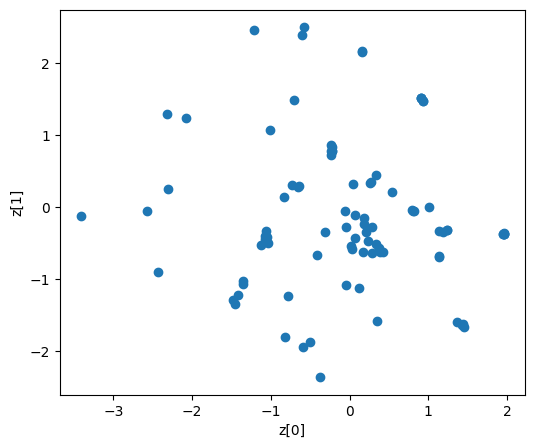

In [199]:
import matplotlib.pyplot as plt
z_mean, _, _ = encoder.predict(preprocessed_images, batch_size=100)
plt.figure(figsize=(6, 5))
plt.scatter(z_mean[:, 0], z_mean[:, 1])
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.show()


1/1 [==============================] - 0s 103ms/step


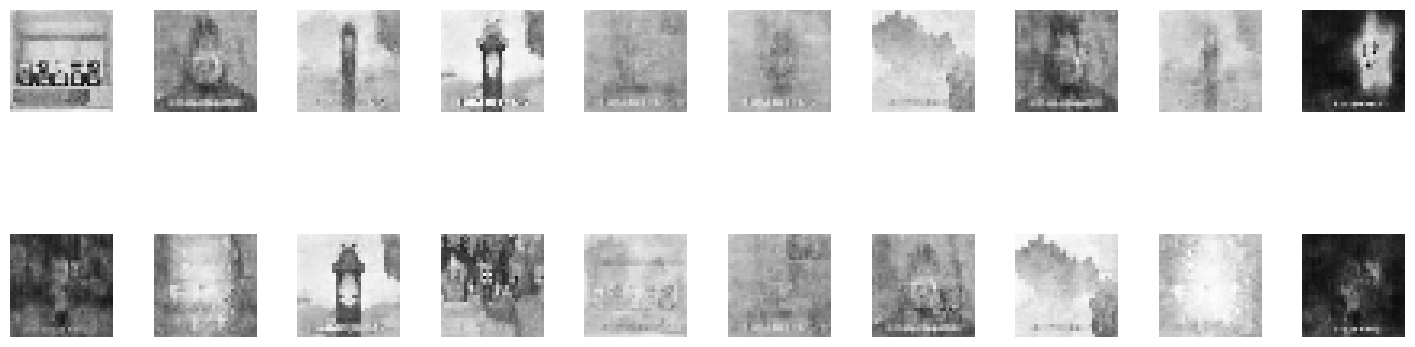

In [200]:
import matplotlib.pyplot as plt
import numpy as np

grid_width, grid_height = (10, 2)
z_sample = np.random.normal(size=(grid_width * grid_height, 2))
reconstructions = decoder.predict(z_sample)
# Convert to 3-channel color image if it's not
if reconstructions.shape[-1] == 1:
    reconstructions = np.squeeze(reconstructions, axis=-1)  # Remove the last dimension
    reconstructions = np.stack([reconstructions]*3, axis=-1)  # Stack along the last dimension to make it 3-channel
fig = plt.figure(figsize=(18, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_width * grid_height):
    ax = fig.add_subplot(grid_height, grid_width, i + 1)
    ax.axis("off")
    ax.imshow(reconstructions[i, :, :, :]) 

1/1 [==============================] - 0s 15ms/step


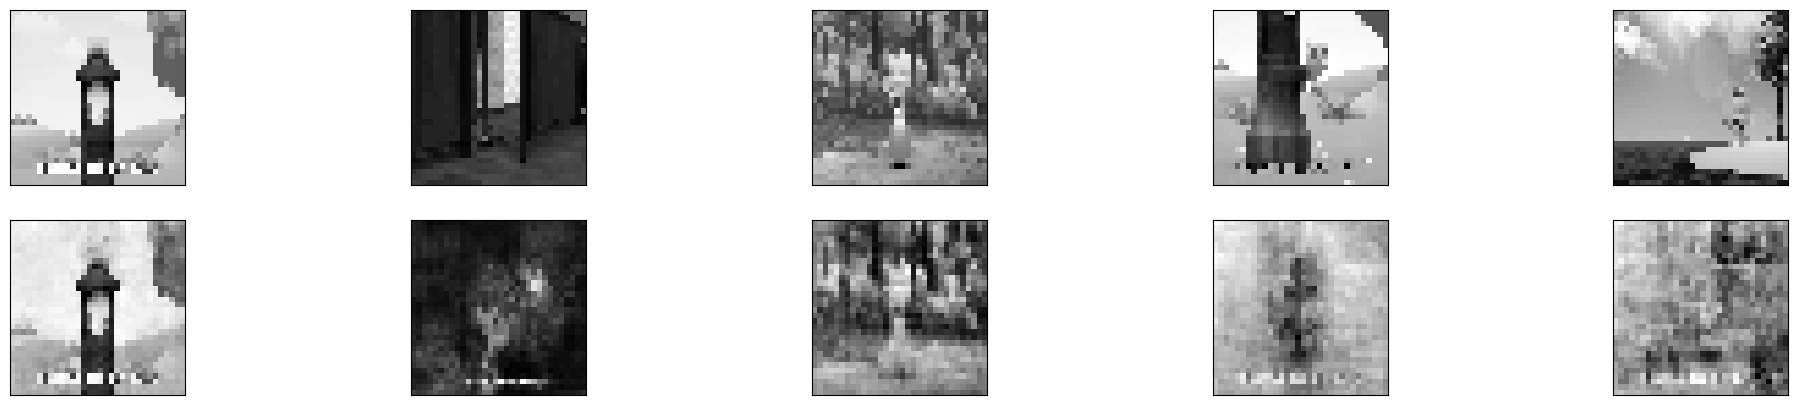

In [201]:
import matplotlib.pyplot as plt
indices = np.random.randint(0, len(test_images), size=5)
# Sample images
sample_images = test_images[indices]
# Step 1: Use the encoder to get the mean and log variance
z_mean, z_log_var, _ = encoder.predict(sample_images)
# Step 2: Use the mean directly for reconstruction
z = z_mean  # No random noise added
# Step 3: Use the decoder to get the reconstructed images
reconstructed_images = decoder.predict(z)

# Number of images to display
n = 5
plt.figure(figsize=(25, 5))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(sample_images[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### III. **GAN**

### Two Approaches Using a GAN

Below are two distinct approaches that leverage Generative Adversarial Networks (GANs) for image generation:

#### Approach 1: VAE-Based GAN
This approach uses the VAE's encoder and decoder as the foundation for the GAN's generator and discriminator.

- **Encoder as Discriminator**: The VAE's encoder maps an image to a latent space. A dense layer is added at the end to output a single value, which is used to classify real and fake images.

#### Approach 2: General GAN Approach
This approach involves creating a generator and discriminator from scratch.

- **Generator and Discriminator**: These are trained together to generate novel scenes that resemble the original keyframes.

Each approach has its own advantages and disadvantages, and the choice between them will depend on the specific requirements of your project.

In [202]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

def build_discriminator_from_encoder(encoder):
    encoder.trainable = False  # Freeze the encoder layers
    x = encoder.layers[-4].output  # Get the output before the latent variables
    validity = layers.Dense(1, activation='sigmoid')(x)
    discriminator = models.Model(encoder.input, validity)
    return discriminator

generator = decoder

def build_gan(generator, discriminator):
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    discriminator.trainable = False
    gan_input = layers.Input(shape=(2,))  # Latent space dimension is 2
    img = generator(gan_input)
    validity = discriminator(img)  
    gan = models.Model(gan_input, validity)
    gan.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return gan

# Hyperparameters
epochs = 200
batch_size = 2
latent_dim = 2

# Build and compile the discriminator
discriminator = build_discriminator_from_encoder(encoder)  # Use the VAE's encoder
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Use the VAE's decoder as the generator
generator = decoder
# Build and compile the GAN
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')
# Labels for real and fake images
real = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))
# Early stopping parameters
patience = 15  # Number of epochs to wait for improvement
best_d_loss = float('inf')  # Initialize best loss as infinity
wait = 0  # Counter for epochs without improvement

for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, train_images.shape[0], batch_size)
    real_imgs = train_images[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_imgs = generator.predict(noise)
    d_loss_real = discriminator.train_on_batch(real_imgs, real)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, real)
    # Print progress
    print(f"{epoch} [D loss: {d_loss[0]} | D Accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")
    # Early stopping check
    if d_loss[0] < best_d_loss:
        best_d_loss = d_loss[0]
        wait = 0  # Reset counter
    else:
        wait += 1  # Increment counter
        if wait >= patience:
            print("Early stopping due to lack of improvement in Discriminator loss.")
            break

1/1 [==============================] - 0s 4ms/step
0 [D loss: 0.6248005330562592 | D Accuracy: 75.0] [G loss: 0.6531970500946045]
1/1 [==============================] - 0s 15ms/step
1 [D loss: 0.918985515832901 | D Accuracy: 25.0] [G loss: 0.6317362785339355]
1/1 [==============================] - 0s 15ms/step
2 [D loss: 0.7994014918804169 | D Accuracy: 25.0] [G loss: 0.5889653563499451]
1/1 [==============================] - 0s 12ms/step
3 [D loss: 0.5917090177536011 | D Accuracy: 75.0] [G loss: 0.6172409653663635]
1/1 [==============================] - 0s 13ms/step
4 [D loss: 0.8324953615665436 | D Accuracy: 50.0] [G loss: 0.6004405617713928]
1/1 [==============================] - 0s 13ms/step
5 [D loss: 0.8049433827400208 | D Accuracy: 25.0] [G loss: 0.5603765845298767]
1/1 [==============================] - 0s 14ms/step
6 [D loss: 0.6263369172811508 | D Accuracy: 25.0] [G loss: 0.5293945670127869]
1/1 [==============================] - 0s 13ms/step
7 [D loss: 0.8216010630130768 | D

In [203]:
def evaluate_performance(generator, discriminator, latent_dim, num_samples=1000):
    # Generate fake images
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    fake_imgs = generator.predict(noise)
    # Labels for fake and real images
    fake_labels = np.zeros((num_samples, 1))
    real_labels = np.ones((num_samples, 1))
    # Evaluate on fake images
    _, acc_fake = discriminator.evaluate(fake_imgs, fake_labels, verbose=0)
    
    # Sample real images
    idx = np.random.randint(0, train_images.shape[0], num_samples)
    real_imgs = train_images[idx]
    # Evaluate on real images
    _, acc_real = discriminator.evaluate(real_imgs, real_labels, verbose=0)
    
    print(f"Accuracy on fake images: {acc_fake * 100}%")
    print(f"Accuracy on real images: {acc_real * 100}%")
evaluate_performance(generator, discriminator, latent_dim)

32/32 [==============================] - 0s 9ms/step
Accuracy on fake images: 30.09999990463257%
Accuracy on real images: 36.000001430511475%


1/1 [==============================] - 0s 14ms/step


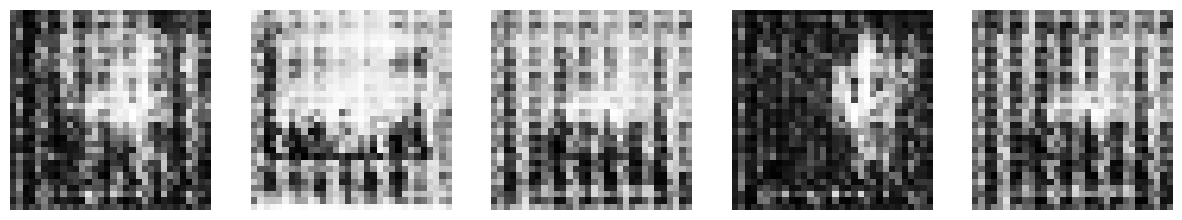

In [206]:
import matplotlib.pyplot as plt

def sample_images(generator, latent_dim, num_samples=5):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    gen_imgs = generator.predict(noise)
    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(1, num_samples, figsize=(15, 25))
    cnt = 0
    for j in range(num_samples):
        axs[j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
        axs[j].axis('off')
        cnt += 1
    plt.show()
sample_images(generator, 2)

In [256]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
# Generator
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(128 * 8 * 8, activation='relu', input_shape=(latent_dim,)),
        layers.BatchNormalization(),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(32, (4, 4), strides=(2, 2), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2DTranspose(32, (4, 4), strides=(2, 2), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2DTranspose(1, (4, 4), strides=(1, 1), activation='tanh', padding='same')
    ])
    return model

# Discriminator
def build_discriminator(img_shape):
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', input_shape=img_shape),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.1),
        layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def build_gan(generator, discriminator):
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    discriminator.trainable = False
    
    gan_input = keras.Input(shape=(latent_dim,))
    img = generator(gan_input)
    validity = discriminator(img)
    
    gan = keras.Model(gan_input, validity)
    gan.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return gan

# Set the latent dimension and image shape
latent_dim = 2
img_shape = (32, 32, 1)

# Hyperparameters
epochs = 500
batch_size = 5

# Build and compile the generator and discriminator
generator = build_generator(latent_dim)
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build and compile the GAN
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Labels for real and fake images
real = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

# Early stopping parameters for Discriminator
patience_d = 10
best_d_loss = float('inf')
wait_d = 0

# Early stopping parameters for GAN (Generator)
patience_g = 10
best_g_loss = float('inf')
wait_g = 0

for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, train_images.shape[0], batch_size)
    real_imgs = train_images[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_imgs = generator.predict(noise)
    
    d_loss_real = discriminator.train_on_batch(real_imgs, real)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, real)
    
    # Early stopping check for Discriminator
    if d_loss[0] < best_d_loss:
        best_d_loss = d_loss[0]
        wait_d = 0
    else:
        wait_d += 1
        if wait_d >= patience_d:
            print("Early stopping due to lack of improvement in Discriminator loss.")
            break

    # Early stopping check for GAN (Generator)
    if g_loss < best_g_loss:
        best_g_loss = g_loss
        wait_g = 0
    else:
        wait_g += 1
        if wait_g >= patience_g:
            print("Early stopping due to lack of improvement in GAN loss.")
            break

    print(f"{epoch} [D loss: {d_loss[0]} | D Accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")

1/1 [==============================] - 0s 79ms/step
0 [D loss: 0.6487441062927246 | D Accuracy: 50.0] [G loss: 0.6538719534873962]
1/1 [==============================] - 0s 16ms/step
1 [D loss: 0.6109314560890198 | D Accuracy: 50.0] [G loss: 0.47295111417770386]
1/1 [==============================] - 0s 13ms/step
2 [D loss: 0.5591652542352676 | D Accuracy: 50.0] [G loss: 0.48088330030441284]
1/1 [==============================] - 0s 4ms/step
3 [D loss: 0.5098743885755539 | D Accuracy: 50.0] [G loss: 0.4106164574623108]
1/1 [==============================] - 0s 2ms/step
4 [D loss: 0.4372873455286026 | D Accuracy: 50.0] [G loss: 0.25886017084121704]
1/1 [==============================] - 0s 21ms/step
5 [D loss: 0.4722305089235306 | D Accuracy: 50.0] [G loss: 0.19548945128917694]
1/1 [==============================] - 0s 6ms/step
6 [D loss: 0.42752972804009914 | D Accuracy: 50.0] [G loss: 0.1911993771791458]
1/1 [==============================] - 0s 8ms/step
7 [D loss: 0.42265136912465096

In [257]:
def evaluate_performance(generator, discriminator, latent_dim, num_samples=1000):
    # Generate fake images
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    fake_imgs = generator.predict(noise)
    # Labels for fake and real images
    fake_labels = np.zeros((num_samples, 1))
    real_labels = np.ones((num_samples, 1))
    # Evaluate on fake images
    _, acc_fake = discriminator.evaluate(fake_imgs, fake_labels, verbose=0)
    
    # Sample real images
    idx = np.random.randint(0, train_images.shape[0], num_samples)
    real_imgs = train_images[idx]
    # Evaluate on real images
    _, acc_real = discriminator.evaluate(real_imgs, real_labels, verbose=0)
    
    print(f"Accuracy on fake images: {acc_fake * 100}%")
    print(f"Accuracy on real images: {acc_real * 100}%")
evaluate_performance(generator, discriminator, latent_dim)

32/32 [==============================] - 0s 8ms/step
Accuracy on fake images: 100.0%
Accuracy on real images: 96.29999995231628%


1/1 [==============================] - 0s 13ms/step


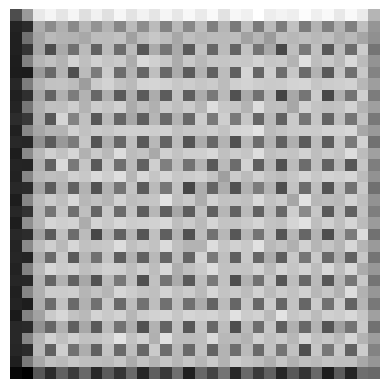

In [265]:
import matplotlib.pyplot as plt

def generate_images(generator, latent_dim, n_samples):
    noise = np.random.normal(0, 1, (n_samples, latent_dim))
    generated_images = generator.predict(noise)
    return generated_images
img = generate_images(generator, latent_dim, 5)
img = (img + 1) / 2.0  
plt.imshow(img[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()

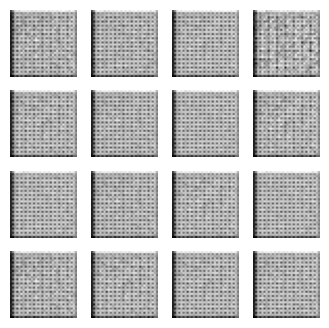

In [266]:
import matplotlib.pyplot as plt
def generate_and_save_images(model, epoch, test_input):
  # Generate images from the model
  predictions = model(test_input, training=False)
  # Rescale the pixel values from [-1, 1] to [0, 1]
  predictions = (predictions + 1) / 2.0
  fig = plt.figure(figsize=(4, 4))
  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0], cmap='gray')
      plt.axis('off')
  # Save the figure
  plt.savefig(f'image_at_epoch_{epoch}.png')

# Generate a random latent vector
noise = tf.random.normal([16, latent_dim])
# Generate and save the image
generate_and_save_images(generator, 100, noise)

1/1 [==============================] - 0s 12ms/step


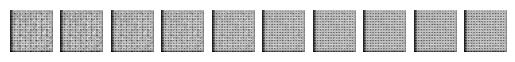

In [267]:
import numpy as np

def interpolate_points(p1, p2, n_steps=10):
    # interpolate ratios between the points
    ratios = np.linspace(0, 1, num=n_steps)
    # linear interpolate vectors
    vectors = p1 + ratios[:, None] * (p2 - p1)
    return vectors

# Randomly generate two points in the latent space
point1 = np.random.randn(1, latent_dim)
point2 = np.random.randn(1, latent_dim)

# Interpolate between the two points
interpolated = interpolate_points(point1, point2)

# Generate and plot the interpolated images
for i, point in enumerate(interpolated):
    img = generator.predict(point[np.newaxis, :])
    img = (img + 1) / 2.0  # Rescale to [0, 1]
    plt.subplot(1, len(interpolated), i+1)
    plt.imshow(img[0, :, :, 0], cmap='gray')
    plt.axis('off')
plt.show()
